In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [30]:
data = pd.read_csv("plasma_volume.csv")
#examining data
data[data['subject'] == 1]
#since the subjects will each have 2 methods, we can split the data

,method,subject,observation
0,Nadler,1,56.9
99,Hurley,1,52.9


In [31]:
# Pivotting data on subject index
df = data.pivot(index="subject", columns="method", values="observation").reset_index()
df.columns.name = None  # Cleaning up data

df.head()

,subject,Hurley,Nadler
0,1,52.9,56.9
1,2,59.2,63.2
2,3,63.0,65.5
3,4,66.2,73.6
4,5,64.8,74.1


         subject      Hurley      Nadler
count  99.000000   99.000000   99.000000
mean   50.000000   89.238384   98.501010
std    28.722813   13.892082   15.179434
min     1.000000   52.900000   56.900000
25%    25.500000   79.050000   87.300000
50%    50.000000   90.400000   99.000000
75%    74.500000   96.950000  107.450000
max    99.000000  121.600000  133.200000


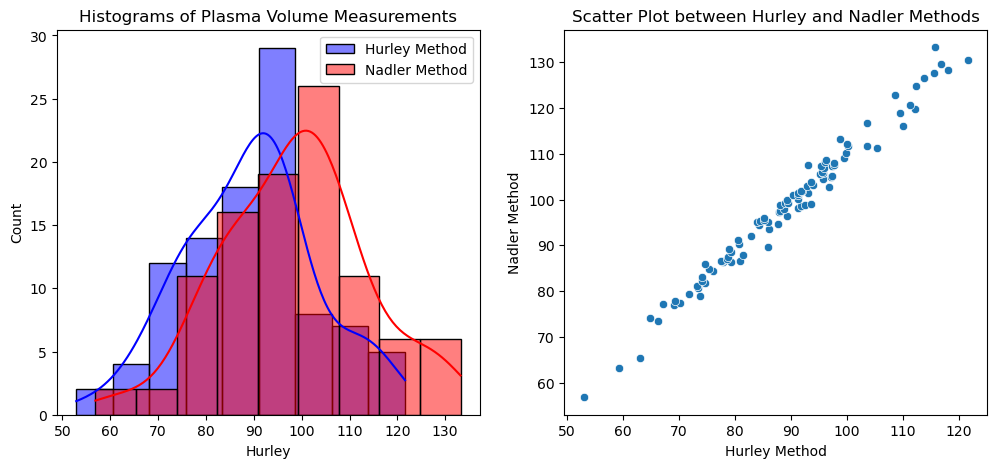

In [32]:
# Summary statistics to idenitfy things like min, max, etc.
stats = df.describe()
print(summary_stats)

#here we have a hisstogram to compare plasma volume measurement distrbutions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Hurley'], kde=True, color="blue", label="Hurley Method")
sns.histplot(df['Nadler'], kde=True, color="red", label="Nadler Method")
plt.legend()
plt.title("Histograms of Plasma Volume Measurements")

#Now, we can build a  Scatter plot bewteen Hurley AND Nadler to determine correlation 
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Hurley'], y=df['Nadler'])
plt.xlabel("Hurley Method")
plt.ylabel("Nadler Method")
plt.title("Scatter Plot between Hurley and Nadler Methods")
plt.show()

In [33]:
# we can unitlize pearson r coefficient function to determine predicted theta
theta_hat, x = pearsonr(df['Hurley'], df['Nadler'])

print(f"Point Estimate of correlation: {theta_hat:.4f}")

# manual calculation for the standard error
n = len(df)
SE = (1 - theta_hat**2) / np.sqrt(n - 2)
print(f"Standard Error of theta_hat: {SE:.4f}")

# Manual calculation for confidence interval
z_score = 1.96  # for 95% confidence
low_ci = theta_hat - z_score * SE
up_ci = theta_hat + z_score * SE
print(f"95% Confidence Interval for theta: [{low_ci:.4f}, {up_ci:.4f}]")

Point Estimate of correlation: 0.9902
Standard Error of theta_hat: 0.0020
95% Confidence Interval for theta: [0.9864, 0.9941]


Bootstrap Bias: 0.0000
Bootstrap Standard Error: 0.0018
95% Confidence Interval for theta: [0.9860, 0.9933]


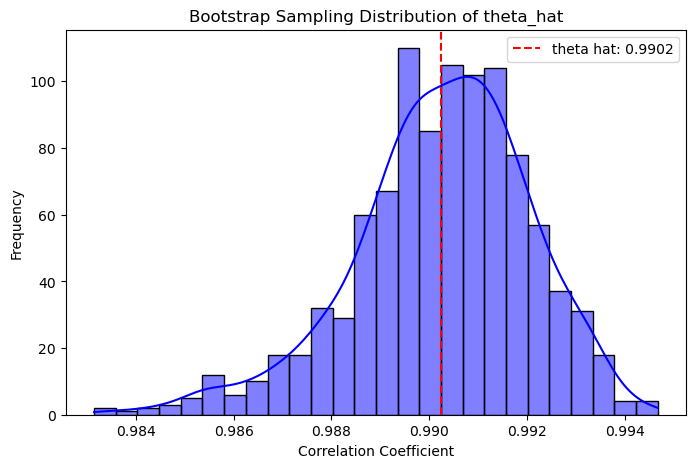

In [34]:
def bootstrap_correlation(data, B=1000): #manual bootstrap correlation
    
    theta_bootstrap = []
    n = len(data)
    
    # for 1000 samples, we are determining the correlation of the sample
    for x in range(B):
        sample = df.sample(n, replace=True) #sample function NOT resample (used for part d)
        theta_sample, x = pearsonr(sample['Hurley'], sample['Nadler'])
        #adding each one to list above
        theta_bootstrap.append(theta_sample)
    
    # creating an array of bootstrap values
    theta_bootstrap = np.array(theta_bootstrap)
    
    #bias/SE calculation using their functions
    bias = np.mean(theta_bootstrap) - theta_hat
    standard_error = np.std(theta_bootstrap)
    
    # Here we use np.percentile method
    lower_ci, upper_ci = np.percentile(theta_bootstrap, [2.5, 97.5])
    
    # Outputting our values
    print(f"Bootstrap Bias: {bias:.4f}")
    print(f"Bootstrap Standard Error: {standard_error:.4f}")
    print(f"95% Confidence Interval for theta: [{lower_ci:.4f}, {upper_ci:.4f}]")
    
    # Outputting all correlations from 1000 samples to determine distribution
    plt.figure(figsize=(8, 5))
    sns.histplot(theta_bootstrap, kde=True, color="blue")
    plt.axvline(theta_hat, color="red", linestyle="--", label=f"theta hat: {theta_hat:.4f}")
    plt.title("Bootstrap Sampling Distribution of theta_hat")
    plt.xlabel("Correlation Coefficient")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    return bias, standard_error, (lower_ci, upper_ci)


bootstrap_bias, bootstrap_se, bootstrap_ci = bootstrap_correlation(df)

In [38]:
from sklearn.utils import resample

# Using given function from sk learn 

B = 1000
correlations = []
for x in range(B):
    sample = resample(data_wide)
    corr, x = pearsonr(sample['Hurley'], sample['Nadler'])
    correlations.append(corr)

# Using same method as above to determine the 95% confidence interval
correlations = np.array(correlations)
ci_lower, ci_upper = np.percentile(correlations, [2.5, 97.5])
print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")

95% Confidence Interval: [0.9860, 0.9934]
